In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

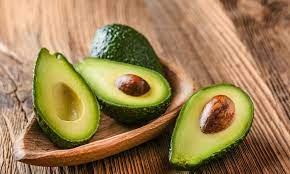


DataSet : https://www.kaggle.com/neuromusic/avocado-prices

It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements. Clearly, they aren't buying home because they are buying too much Avocado Toast! But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

Given the data set with the avocado prices from 2015 to 2018, we will predict the prices.

**Some relevant columns in the dataset:**

* Date - The date of the observationAveragePrice 
* the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [ ]:
#importing libraries
import sklearn
import pandas as pd
import seaborn as sns
import keras as K
import keras.layers as Dense
import keras.models as Sequential
import keras.optimizers as Adam
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# **Exploratory Data Analysis**

In [ ]:
#loading dataset
av_data = pd.read_csv("../input/avocado-prices/avocado.csv")

In [ ]:
av_data.head(10)

In [ ]:
av_data.shape

**1. Check for Missing Data**

In [ ]:
av_data.isnull().sum()

**2. Check for duplicate values**

In [ ]:
print('total number of duplicate values : ',sum(av_data.duplicated()))

So we do not have to drop any row or column and we can proceed to the next step.

**3. Check for Unique values in each columns**

In [ ]:
print ("\nUnique values :  \n",av_data.nunique())

**4. Class Imbalance Check**

In [ ]:
len(av_data.region.unique())

In [ ]:
av_data.groupby('region').size() 

There are ~338 observations from each region, dataset seems balanced.Also, there are 54 regions.

In [ ]:
av_data.head()

# **Data overview**

In [ ]:
pp.ProfileReport(av_data)

# **Feature Importance**

**1. The average prices by regions**

In [ ]:
plt.figure(figsize=(15,15))

plt.title("Avgerage Price of Avocado by Region")

sns.barplot(x="AveragePrice",y="region",data=av_data)

plt.show()

In [ ]:
av_data.head()

**2. The average prices of avocados by types**

In [ ]:
plt.figure(figsize=(5,7))

plt.title("Avg.Price of Avocados by Type")

sns.barplot(x="type",y="AveragePrice",data=av_data)

plt.show()

**3. Correlation**

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(av_data.corr(),cmap='coolwarm',annot=True)

There is a high correlation between pairs:

* 4046 & total volume (0.98)
* 4225 & total volume (0.97)
* 4770 & total volume (0.87)
* total bags & total volume (0.96)
* small bags & total bags (0.99)
etc

* 4046 avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.

* Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them.
* Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

**4. Outliers**

In [ ]:
av_data.describe()

Conclusion: I usually take a look at the min and max values to identify outliers but I didn't find any this time.

In [ ]:
av_data['type'].value_counts()

In [ ]:
av_data.head(2)

# **Select the model**

Stay Tuned!